# ECON 220 Lab - Week 10

Justin S. Eloriaga

Today, the goal is to cover many types of statistical tests. We will use a dataset most people will be familiar with in the realm of economics and that you will likely revisit in ECON 320. The Current Population Survey (CPS) is a monthly survey of about 57,000 U.S. households conducted by the Bureau of the Census of the Bureau of Labor Statistics. We will use the version in Bruce Hansen's Textbook

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

You may want to install the openpyxl library so that you can load excel files

In [ ]:
pip install openpyxl

Let us now load the dataset

In [5]:
path = "/Users/justineloriaga/Documents/GitHub/ECON-220-Lab/Week 10/cps09mar.xlsx"

data = pd.read_excel(path)
data

,age,female,hisp,education,earnings,hours,week,union,uncov,region,race,marital
0,52,0,0,12,146000,45,52,0,0,1,1,1
1,38,0,0,18,50000,45,52,0,0,1,1,1
2,38,0,0,14,32000,40,51,0,0,1,1,1
3,41,1,0,13,47000,40,52,0,0,1,1,1
4,42,0,0,13,161525,50,52,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
50737,58,1,0,11,30000,40,52,0,0,4,4,6
50738,62,1,0,16,35000,40,52,0,0,4,4,6
50739,58,0,0,12,75000,50,52,0,0,4,1,1
50740,45,1,0,12,40000,60,52,0,0,4,1,1


## One Sample $t$-test

Generally, people work 8 hours a day. That means, in a working week, they should be working 40 hours. Let us try to test that claim.

$$H_0: \mu = 40$$
$$H_a: \mu \neq 40$$

We want to test the null hypothesis that people on average work 40 hours a week. To do that, we perform a one sample t-test

In [7]:
from scipy.stats import ttest_1samp

# Perform one-sample t-test
t_stat, p_value = ttest_1samp(data['hours'], 40)

# Display the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 111.89928138308288
P-value: 0.0


Here, we see that the t-stat is very high $implies$ a very low p value. Suppose we use a 95% significance level, we see that we will reject the null hypothesis. 

## Two-Sample $t$-test

Let us try and look at the average number of hours worked by gender.

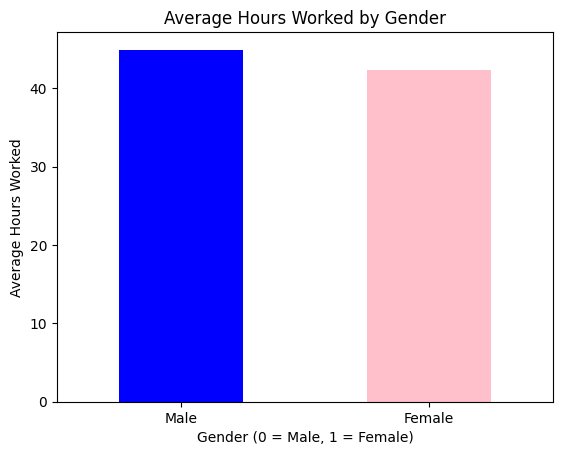

In [8]:
# Calculate average hours worked by gender
avg_hours_by_gender = data.groupby('female')['hours'].mean()

# Plot the bar chart
avg_hours_by_gender.plot(kind='bar', color=['blue', 'pink'], legend=False)
plt.title('Average Hours Worked by Gender')
plt.xlabel('Gender (0 = Male, 1 = Female)')
plt.ylabel('Average Hours Worked')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'], rotation=0)
plt.show()

Notice that, based on the graph, it appears males have on average higher working hours than women. But we need to formalize this with a test.

$$H_0: \mu_m = \mu_f$$
$$H_a: \mu_m \neq \mu_f$$

My null hypothesis states that the average hours worked by males $\mu_m$ is equal to the average number of hours worked by females $\mu_f$

In [25]:
from scipy.stats import ttest_ind

# Separate hours worked by gender
male_hours = data[data['female'] == 0]['hours']
female_hours = data[data['female'] == 1]['hours']

# Perform two-sample t-test
t_stat, p_value = ttest_ind(male_hours, female_hours, equal_var=False)

# Display the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 39.78489011605316
P-value: 0.0


Since the p-value is very low and the t-stat is very high, we reject the null hypothesis that the average hours worked between male and female is the same. As such, we have evidence to believe that there is some difference in the average hours. What about income?

In [26]:
# Separate earnings by gender
male_earnings = data[data['female'] == 0]['earnings']
female_earnings = data[data['female'] == 1]['earnings']

# Perform two-sample t-test
t_stat_earnings, p_value_earnings = ttest_ind(male_earnings, female_earnings, equal_var=False)

# Display the results
print(f"T-statistic (Earnings): {t_stat_earnings}")
print(f"P-value (Earnings): {p_value_earnings}")

T-statistic (Earnings): 43.9266197324469
P-value (Earnings): 0.0


We see an even more higher t-stat of the null hypothesis in this case. Graphing the data will backup the result

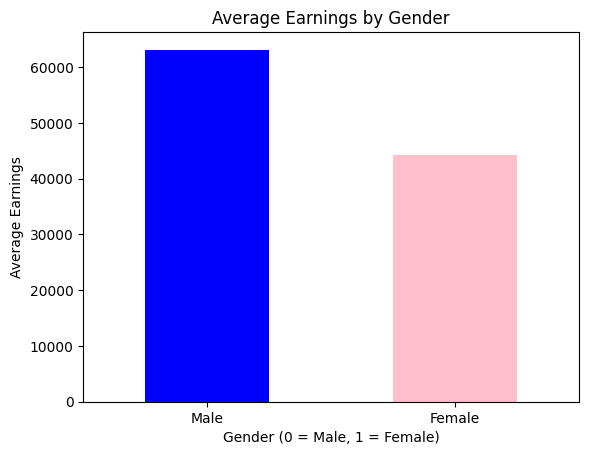

In [27]:
# Calculate average earnings by gender
avg_earnings_by_gender = data.groupby('female')['earnings'].mean()

# Plot the bar chart
avg_earnings_by_gender.plot(kind='bar', color=['blue', 'pink'], legend=False)
plt.title('Average Earnings by Gender')
plt.xlabel('Gender (0 = Male, 1 = Female)')
plt.ylabel('Average Earnings')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'], rotation=0)
plt.show()

## Two Sample Proportion Test

Suppose I want to look at the proportion of people who work more than 40 hours a week. Let's called these people over worked (i.e. stressed).

In [12]:
# Create a new variable 'over' indicating if hours > 40
data['overworked'] = (data['hours'] > 40).astype(int)
data[['hours', 'overworked']].head()

,hours,overworked
0,45,1
1,45,1
2,40,0
3,40,0
4,50,1


We can compare the proportion of males who are overworked $p_m$ versus the proportion of females $p_f$ that are overworked. Suppose let's state an initial claim that the proportion of males and females that are overworked are the same. Hence, we can form the hypothesis below

$$H_0: p_m = p_f$$
$$H_a: p_m \neq p_f$$

Analogously, this is equivalent to 

$$H_0: p_m - p_f = 0$$
$$H_a: p_m - p_f \neq 0$$

To better visualize this, we can generate a frequency table.

In [16]:
# Generate a frequency table for 'overworked' and 'female' with row and column sums
frequency_table_with_totals = pd.crosstab(data['overworked'], data['female'], rownames=['Overworked'], colnames=['Female'], margins=True)
print(frequency_table_with_totals)

Female          0      1    All
Overworked                     
0           17938  16722  34660
1           11202   4880  16082
All         29140  21602  50742


From here, we can calculate the proportions

In [17]:
# Generate a table with proportions for 'overworked' and 'female'
proportion_table = frequency_table_with_totals.div(frequency_table_with_totals.loc['All', 'All'])
print(proportion_table)

Female             0         1       All
Overworked                              
0           0.353514  0.329549  0.683063
1           0.220764  0.096173  0.316937
All         0.574278  0.425722  1.000000


Clearly, 22.08% of males are overworked while only 9.62% of females are overworked

To test if the difference is statistically significant, we can do a test of two sample proportions

In [18]:
from statsmodels.stats.proportion import proportions_ztest

# Extract counts of overworked males and females
count = [frequency_table_with_totals.loc[1, 0], frequency_table_with_totals.loc[1, 1]]

# Extract total counts of males and females
nobs = [frequency_table_with_totals.loc['All', 0], frequency_table_with_totals.loc['All', 1]]

# Perform the two-sample proportion z-test
z_stat, p_value = proportions_ztest(count, nobs)

# Display the results
print(f"Z-statistic: {z_stat}")
print(f"P-value: {p_value}")

Z-statistic: 37.94562327861474
P-value: 0.0


Since the p-value is very low and the z-stat is very high, we reject the null hypothesis that the proportions are equal and conclude that there is sufficient evidence to show that the proportion of males overworked is statistically different that the proportion of females overworked.

## Chi-Squared Test

The example above deals with explicitly two possible options (female or male). But suppose you wanted to compare the "overworked" variable across region. Note that, based on the codebook, we have 4 possible regions. Northwest, Midwest, South, and West 

In [20]:
# Recode the 'region' variable
data['region'] = data['region'].replace({1: 'Northwest', 2: 'Midwest', 3: 'South', 4: 'West'})

From here, let us generate another frequency table

In [ ]:
# Transpose the frequency table to have regions on the left and overworked on top
frequency_table_region_transposed = frequency_table_region.T
print(frequency_table_region_transposed)

Region      Midwest  Northwest  South   West    All
Overworked                                         
0              7950       6356  11346   9008  34660
1              4075       3343   4738   3926  16082
All           12025       9699  16084  12934  50742


As before, from here, we can compute the proportions

In [23]:
# Generate a frequency table of proportions for 'region' and 'overworked'
proportion_table_region = frequency_table_region.div(frequency_table_region['All'], axis=0)
print(proportion_table_region)

Region       Midwest  Northwest     South      West  All
Overworked                                              
0           0.229371   0.183381  0.327351  0.259896  1.0
1           0.253389   0.207872  0.294615  0.244124  1.0
All         0.236983   0.191143  0.316976  0.254897  1.0


It appears that the Northwest (20.79%) has the lowest amount of people overworked while most people in the South (29.47%) are

To test if there is a significant difference in the proportion across regions, we can use a Chi-squared test

In [24]:
from scipy.stats import chi2_contingency

# Perform Chi-squared test
chi2_stat, p_value, dof, expected = chi2_contingency(frequency_table_region.iloc[:-1, :-1])

# Display the results
print(f"Chi-squared Statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Chi-squared Statistic: 109.06978817413061
P-value: 1.739871441323308e-23
Degrees of Freedom: 3
Expected Frequencies:
[[ 8213.83666391  6625.03133499 10986.39076111  8834.74124   ]
 [ 3811.16333609  3073.96866501  5097.60923889  4099.25876   ]]


Here, we see that there is evidence that there is a significant difference in the proportions overworked across regions given that the p-value is very low and the chi-squared statsitic is very high.